In [1]:
# Imports
import os, sys
sys.path.append('/home/izabel/Documentos/env_tcc/lib/python3.6/site-packages')

import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import time

# Current working directory
cwd = os.getcwd()
print(cwd)

/home/izabel/Documentos/projeto-formatura-poli


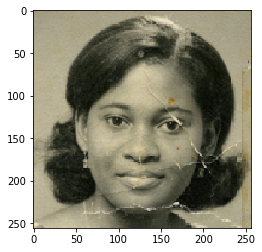

In [2]:
# Define o caminho e inicializa a imagem

img_number = '2'

source_jpg = 'img_' + img_number + '.jpg'
source_png = 'img_' + img_number + '.png'

img_filepath = cwd + '/images/' + source_jpg
mask_filepath = cwd + '/masks/' + 'mask_'+ source_png
inpaint_opencv_filepath = cwd + '/inpaints/' + 'inpaint_opencv_' + source_jpg
inpaint_generative_filepath = cwd + '/inpaints/' + 'inpaint_generative_' + source_png

image = np.asarray(Image.open(img_filepath))

plt.imshow(image)

In [3]:
%%time

# Create HSV and grayscale formats
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define variables used in masking
max_gray = np.amax(gray)
min_color = np.array([0,0,max_gray-60])
max_color = np.array([255,60,max_gray])

# Create initial region mask
reg = cv2.inRange(hsv, min_color, max_color)

# plt.imshow(gray, cmap="gray")

# Blur the image for better line detection
blur = cv2.GaussianBlur(gray,(3, 3),0)

# Define morphologial transformation kernel
kernel = np.ones((3,3),np.uint8)

# Create edges and dilate to get better results
edges = cv2.Canny(gray, 100, 150)
edges = cv2.dilate(edges, kernel)

# plt.imshow(edges, cmap="gray")

# Intersect region and edges
mask = reg & edges
mask = cv2.dilate(mask, kernel)

# Save mask
cv2.imwrite(mask_filepath, mask)

CPU times: user 5.54 ms, sys: 4.17 ms, total: 9.71 ms
Wall time: 7.05 ms


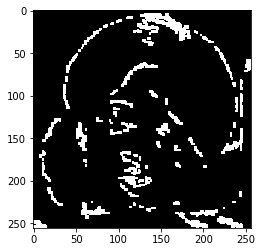

In [4]:
plt.imshow(mask, cmap="gray")

<h1>Inpaint com Deep Generative Model with Contextual Attention</h1>

In [5]:
# %%time
# %%bash 

# python test.py  --image images/img_1.jpg \
#                 --mask masks/mask_img_2.jpg \
#                 --output inpaints/inpaint_generative_img_2.png \
#                 --checkpoint_dir model_logs/release_celeba_256/

In [8]:
%%time
%%bash 

for i in 2
do
    img="img_$i.png"

    mask="mask_$img"
    out="inpaint_generative_$img"

    echo "Inpainting: $img"
    echo "Inpainting: $mask"
    echo "Inpainting: $out"
    
    python test.py  --image images/$img \
                    --mask masks/$mask \
                    --output inpaints/$out \
                    --checkpoint_dir model_logs/release_celeba_256/
done

Inpainting: img_2.png
Inpainting: mask_img_2.png
Inpainting: inpaint_generative_img_2.png
Shape of image: (256, 256, 3)
Model loaded.


[2018-10-18 22:45:52 @__init__.py:79] Set root logger. Unset logger with neuralgym.unset_logger().
[2018-10-18 22:45:52 @__init__.py:80] Saving logging to file: neuralgym_logs/20181018224552381318.
/bin/sh: 1: nvidia-smi: not found
[2018-10-18 22:45:54 @gpus.py:39] Error reading GPU information, set no GPU.
libpng warning: iCCP: known incorrect sRGB profile
2018-10-18 22:45:54.154114: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


CPU times: user 8.76 ms, sys: 11.7 ms, total: 20.4 ms
Wall time: 5.25 s


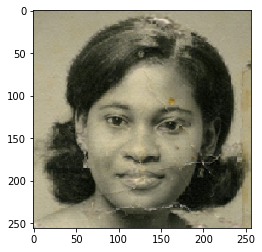

In [9]:
plt.imshow(np.asarray(Image.open(inpaint_generative_filepath)))

<h1>Inpaint com OpenCV</h1>

In [10]:
%%time
inpaint = cv2.inpaint(image,mask,3,cv2.INPAINT_TELEA)
save = cv2.cvtColor(inpaint, cv2.COLOR_BGR2RGB)

# Save inpaint 
cv2.imwrite(inpaint_opencv_filepath, save)


CPU times: user 43.3 ms, sys: 2.24 ms, total: 45.6 ms
Wall time: 47.8 ms


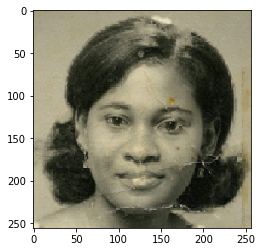

In [11]:
plt.imshow(inpaint)